# Regression

In [1]:
# DAL ToolBox
# version 1.0.77

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox-examples/main/jupyter.R")

load_library("daltoolbox")
load_library("MASS")
load_library("plotly")
load_library("reshape2")

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: MASS

Loading required package: plotly

Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: reshape2



## Dataset
Both independent and dependent variables are numeric. 

In [2]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


## Fitting a first model
Explaining house price using lower status population variable.

$lm$ builds the model.

$summary$ describes the significance of the built model.

In [3]:
lm.fit = lm(medv ~ lstat, data = Boston)

summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


## prediction
The $predict$ function makes predictions from the adjusted model.

The predictions can be presented with either $confidence$ and $prediction$ intervals. 

These intervals can be analyzed at https://statisticsbyjim.com/hypothesis-testing/confidence-prediction-tolerance-intervals/


In [4]:
predict(lm.fit, data.frame(lstat =(c(5, 10, 15))), interval = "confidence")
predict(lm.fit, data.frame(lstat =(c(5, 10, 15))), interval = "prediction")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


## Plotting the regression model

It is a good practice to plot the regression model. It enables us to have a feeling of its quality.

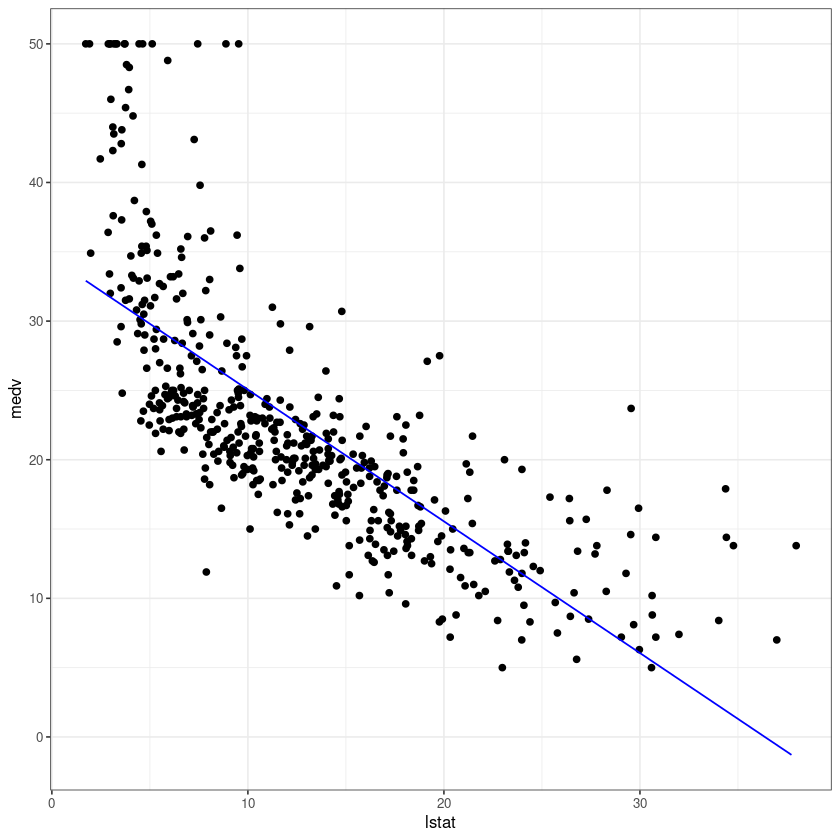

In [5]:
axis_x <- seq(min(Boston$lstat), max(Boston$lstat), by = 0.5)
axis_y <- predict(lm.fit, data.frame(lstat=axis_x))

data_adj = data.frame(lstat=axis_x, medv=axis_y)

ggplot(Boston) + geom_point(aes(x = lstat, y = medv)) + geom_line(data=data_adj,aes(x=lstat,y=medv), color="Blue") + theme_bw(base_size = 10) 

# Polynomial regression

It is possible to introduce polynomial dimensions of independent data. 

In [6]:
lm.fit_p =lm(medv~lstat+I(lstat^2), data=Boston)
summary (lm.fit_p)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


## Plotting the polynomial regression model

It seems to be better adjusted with the data. Is it significant?

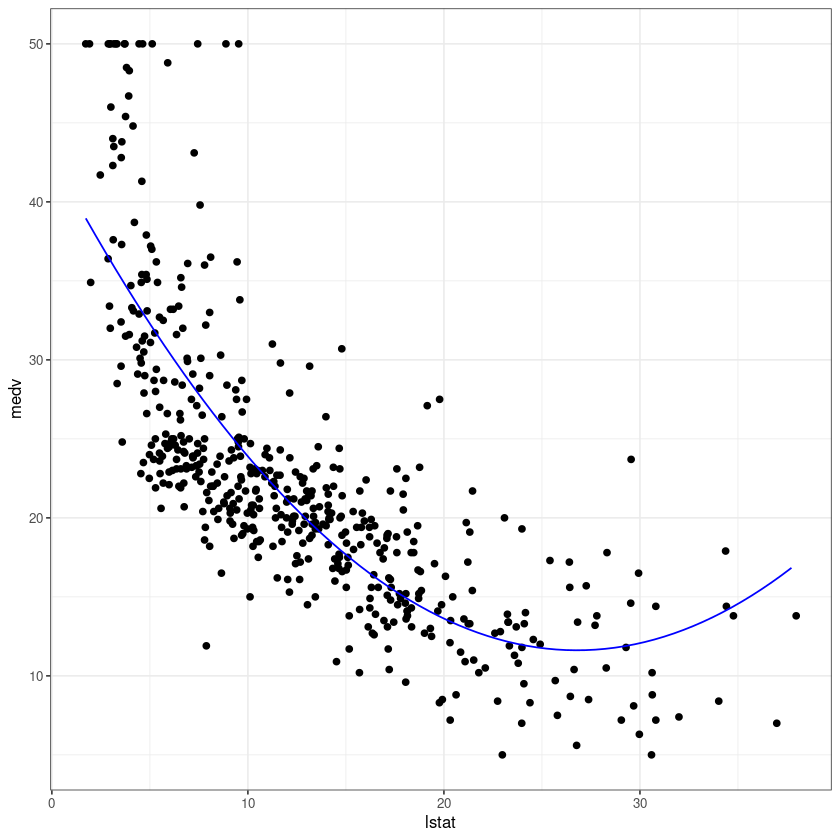

In [7]:
axis_x <- seq(min(Boston$lstat), max(Boston$lstat), by = 0.5)
axis_x2 <- axis_x^2
axis_y <- predict(lm.fit_p, data.frame(lstat=axis_x, `I(lstat^2)`=axis_x2))


data_adj = data.frame(lstat=axis_x, medv=axis_y)
ggplot(Boston) + geom_point(aes(x = lstat, y = medv)) + geom_line(data=data_adj,aes(x=lstat,y=medv), color="Blue") + theme_bw(base_size = 10) 

## ANOVA test

It is possible to check if a built model is significantly better than another model using the ANOVA test. 

The null hypothesis is that both models are not different ($\operatorname{p-value} > 5\%$). The alternative hypothesis says that they are different ($\operatorname{p-value} < 5\%$). 

In [8]:
anova(lm.fit, lm.fit_p)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,19472.38,NA,NA,NA,NA
2,503,15347.24,1,4125.138,135.1998,7.630116e-28


# Multiple regression

It is possible to use more than one dimension as independent data for the regression model. 

In [9]:
lm.fit2 =lm(medv~lstat+age, data=Boston)
summary (lm.fit2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


## Checking the significance of the model


In [10]:
anova(lm.fit ,lm.fit2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,19472.38,NA,NA,NA,NA
2,503,19168.13,1,304.2528,7.984043,0.004906776


# Logistic Regression
In this example the predicted dependent variable is categorical.

In [11]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


To make the problem simpler, let us assume that we intend to predict if a species is $versicolor$ or if it is $other$ species. 

In [12]:
data <- iris
data$versicolor <- as.integer(data$Species=="versicolor")
data$Species <- c('other', 'versicolor')[data$versicolor+1]

Using preprocessing functions, we separate both training and test data. 

In [13]:
tt <- daltoolbox::train_test(daltoolbox::sample_random(), data)
train <- tt$train
test <- tt$test
head(train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,versicolor
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
116,6.4,3.2,5.3,2.3,other,0
32,5.4,3.4,1.5,0.4,other,0
139,6.0,3.0,4.8,1.8,other,0
71,5.9,3.2,4.8,1.8,versicolor,1
8,5.0,3.4,1.5,0.2,other,0
6,5.4,3.9,1.7,0.4,other,0


This dataset is unbalanced using this perspective. If the prediction for $versicolor$ is higher than its probability, it can be classified as $versicolor$. 

In [14]:
t <- mean(train$versicolor)
print(t)

[1] 0.35


The creation of the logistic regression model using all independent variables uses $glm$ function.

In [15]:
pred <- glm(versicolor ~ .-Species, data=train, family = binomial)

The quality of adjustment using training data is measured using the confusion table. 

In [16]:
res <- predict(pred, train, type="response")
res <- as.integer(res >= t)
table(res, train$versicolor)

   
res  0  1
  0 58 11
  1 20 31

The quality of prediction using the test data is measured using the confusion table. 

In [17]:
res <- predict(pred, test, type="response")
res <- res >= t
table(res, test$versicolor)

       
res      0  1
  FALSE 15  1
  TRUE   7  7

Creation of the logistic regression model using the independent variables with lower entropy during binning transformation.  

In [18]:
pred <- glm(versicolor ~ Petal.Length + Petal.Width, data=train, family = binomial)

The quality of adjustment using training data is measured using the confusion table. 

In [19]:
res <- predict(pred, train, type="response")
res <- as.integer(res >= t)
table(res, train$versicolor)

   
res  0  1
  0 63  8
  1 15 34

The quality of prediction using the test data is measured using the confusion table. 

In [20]:
res <- predict(pred, test, type="response")
res <- as.integer(res >= t)
table(res, test$versicolor)

   
res  0  1
  0 15  0
  1  7  8